Socially responsible investing (SRI) is a strategy that targets companies that promote ethical practices, environmental stewardship, and social justice. It draws inspiration from various periods in U.S. history, including the establishment of Quakerism (1700s) and the Civil Rights Movement (1960s). In recent years, the availability of socially responsible mutual funds and exchange-traded funds (ETFs) have facilitated easy and diversified investments consistent with various socially responsible values (e.g., clean energy, gender diversity). In this assignment, you will perform processing and analysis on a selection of 82 socially responsible ETFs identified by ETF.com. The data contains information on the ticker (stock symbol), fund name, issuer, total assets under management (AUM), expense ration, 30-day trailing return, and market segment of each ETF.

### Exercise #1 

a. Import the ETF data into a data frame using an appropriate method, and complete the following processing tasks:

- Ensure all missing values are explicitly represented by numpy.nan
- Ensure all numerical columns are represented by appropriate numerical types (i.e., integer or floating point values)
- Separate the elements of the SEGMENT column into distinct columns:
    - (Asset) Class: Equity or Fixed Income
    - Market: U.S., China, Developed Markets, Emerging Markets, etc.
    - Segment: Total Market, Large Cap, Small Cap, Renewable Energy, etc.
    
Index the data frame by ISSUER and TICKER, and sort the data frame lexicographically (i.e., by ISSUER and then TICKER). Display the full data frame as proof of your processing.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

In [29]:
path = 'F:/MS in Business Analytics/Spring/Python/Data Files/'
df = pd.read_excel(path + 'socially_responsible_etfs.xlsx')
df.head()

,TICKER,FUND NAME,ISSUER,AUM,EXPENSE RATIO,3-MO TR,SEGMENT
0,DSI,iShares MSCI KLD 400 Social ETF,BlackRock,$1.31B,0.0025,0.0678,Equity: U.S. - Total Market
1,SUSA,iShares MSCI U.S.A. ESG Select ETF,BlackRock,$905.59M,0.0025,0.0673,Equity: U.S. - Total Market
2,USSG,Xtrackers MSCI U.S.A. ESG Leaders Equity ETF,Deutsche Bank,$856.18M,0.0010,--,Equity: U.S. - Total Market
3,ESGD,iShares ESG MSCI EAFE ETF,BlackRock,$643.78M,0.0020,0.0571,Equity: Developed Markets Ex-U.S. - Total Market
4,ESGE,iShares ESG MSCI EM ETF,BlackRock,$503.64M,0.0025,0.0807,Equity: Emerging Markets - Total Market


In [30]:
df['3-MO TR'][df['3-MO TR'] == '--'] = np.nan
df.head()

,TICKER,FUND NAME,ISSUER,AUM,EXPENSE RATIO,3-MO TR,SEGMENT
0,DSI,iShares MSCI KLD 400 Social ETF,BlackRock,$1.31B,0.0025,0.0678,Equity: U.S. - Total Market
1,SUSA,iShares MSCI U.S.A. ESG Select ETF,BlackRock,$905.59M,0.0025,0.0673,Equity: U.S. - Total Market
2,USSG,Xtrackers MSCI U.S.A. ESG Leaders Equity ETF,Deutsche Bank,$856.18M,0.0010,NaN,Equity: U.S. - Total Market
3,ESGD,iShares ESG MSCI EAFE ETF,BlackRock,$643.78M,0.0020,0.0571,Equity: Developed Markets Ex-U.S. - Total Market
4,ESGE,iShares ESG MSCI EM ETF,BlackRock,$503.64M,0.0025,0.0807,Equity: Emerging Markets - Total Market


In [31]:
df['AUM'].unique()

array(['$1.31B', '$905.59M', '$856.18M', '$643.78M', '$503.64M',
       '$411.69M', '$324.82M', '$304.43M', '$298.83M', '$270.09M',
       '$249.39M', '$228.01M', '$222.00M', '$202.27M', '$174.29M',
       '$162.44M', '$126.74M', '$124.78M', '$117.06M', '$111.14M',
       '$106.88M', '$105.18M', '$101.95M', '$97.50M', '$89.57M',
       '$72.39M', '$71.84M', '$70.48M', '$70.32M', '$70.09M', '$69.36M',
       '$69.27M', '$61.35M', '$61.22M', '$59.07M', '$56.45M', '$54.10M',
       '$53.73M', '$51.74M', '$50.81M', '$50.48M', '$48.73M', '$45.76M',
       '$44.06M', '$43.59M', '$42.97M', '$39.59M', '$38.70M', '$38.14M',
       '$31.58M', '$28.52M', '$28.31M', '$27.60M', '$26.48M', '$25.90M',
       '$25.59M', '$25.57M', '$23.52M', '$22.86M', '$22.35M', '$18.08M',
       '$16.26M', '$14.77M', '$12.54M', '$7.71M', '$7.68M', '$7.19M',
       '$6.31M', '$6.02M', '$5.98M', '$4.87M', '$4.34M', '$4.31M',
       '$4.27M', '$4.06M', '$3.92M', '$3.43M', '$2.73M', '$2.56M',
       '$2.12M', '$1.98M', 

In [32]:
df['AUM'][df['AUM']=='$1.31B'] = '$1310.00M'

In [33]:
df['AUM'] = df['AUM'].str[1:-1]

for col in ['AUM', 'EXPENSE RATIO', '3-MO TR']:
    df[col] = df[col].astype('float')
df.dtypes

TICKER            object
FUND NAME         object
ISSUER            object
AUM              float64
EXPENSE RATIO    float64
3-MO TR          float64
SEGMENT           object
dtype: object

In [34]:
df['SEGMENT'].value_counts()

Equity: U.S. - Total Market                                                  19
Equity: Global Renewable Energy                                              10
Equity: U.S. - Large Cap                                                      8
Equity: Global - Total Market                                                 7
Equity: Emerging Markets - Total Market                                       7
Equity: Developed Markets Ex-U.S. - Total Market                              5
Equity: Global Ex-U.S. - Total Market                                         2
Equity: Developed Markets - Total Market                                      2
Fixed Income: U.S. - Broad Market, Broad-based Investment Grade               2
Fixed Income: U.S. - Corporate, Broad-based Investment Grade Intermediate     2
Equity: China - Total Market                                                  2
Equity: Global Environment                                                    2
Equity: U.S. - Small Cap                

In [35]:
df['SEGMENT'][df['SEGMENT']=='Equity: Global Renewable Energy'] = 'Equity: Global - Renewable Energy'
df['SEGMENT'][df['SEGMENT']=='Equity: Global Environment'] = 'Equity: Global - Environment'
df['SEGMENT'][df['SEGMENT']=='Equity: Global Water'] = 'Equity: Global - Water'

In [36]:
df['SEGMENT'].value_counts()

Equity: U.S. - Total Market                                                  19
Equity: Global - Renewable Energy                                            10
Equity: U.S. - Large Cap                                                      8
Equity: Emerging Markets - Total Market                                       7
Equity: Global - Total Market                                                 7
Equity: Developed Markets Ex-U.S. - Total Market                              5
Equity: Global Ex-U.S. - Total Market                                         2
Fixed Income: U.S. - Broad Market, Broad-based Investment Grade               2
Equity: Global - Environment                                                  2
Fixed Income: U.S. - Corporate, Broad-based Investment Grade Intermediate     2
Equity: China - Total Market                                                  2
Equity: Developed Markets - Total Market                                      2
Equity: U.S. - Small Cap                

In [37]:
df['SEGMENT'] = df['SEGMENT'].str.replace('Broad-based', 'Broad based')
df['SEGMENT'] = df['SEGMENT'].str.replace('Short-Term', 'Short Term')
df['SEGMENT'] = df['SEGMENT'].str.replace('Ex-U.S.', 'Ex U.S.')
df['SEGMENT'].value_counts()

Equity: U.S. - Total Market                                                  19
Equity: Global - Renewable Energy                                            10
Equity: U.S. - Large Cap                                                      8
Equity: Global - Total Market                                                 7
Equity: Emerging Markets - Total Market                                       7
Equity: Developed Markets Ex U.S. - Total Market                              5
Equity: China - Total Market                                                  2
Fixed Income: U.S. - Corporate, Broad based Investment Grade Intermediate     2
Equity: U.S. - Small Cap                                                      2
Fixed Income: U.S. - Broad Market, Broad based Investment Grade               2
Equity: Developed Markets - Total Market                                      2
Equity: Global Ex U.S. - Total Market                                         2
Equity: Global - Environment            

In [38]:
df['CLASS'] = df['SEGMENT'].str.split(':').str[0]
df['MARKET'] = df['SEGMENT'].str.split(':').str[1].str.split('-').str[0]
df['SEGMENT'] = df['SEGMENT'].str.split('-').str[1]
df.head(3)

,TICKER,FUND NAME,ISSUER,AUM,EXPENSE RATIO,3-MO TR,SEGMENT,CLASS,MARKET
0,DSI,iShares MSCI KLD 400 Social ETF,BlackRock,1310.00,0.0025,0.0678,Total Market,Equity,U.S.
1,SUSA,iShares MSCI U.S.A. ESG Select ETF,BlackRock,905.59,0.0025,0.0673,Total Market,Equity,U.S.
2,USSG,Xtrackers MSCI U.S.A. ESG Leaders Equity ETF,Deutsche Bank,856.18,0.0010,NaN,Total Market,Equity,U.S.


In [39]:
df.set_index(keys=['ISSUER', 'TICKER'], drop=True, inplace=True)
df.head()

FUND NAME      AUM  \
ISSUER        TICKER                                                          
BlackRock     DSI                  iShares MSCI KLD 400 Social ETF  1310.00   
              SUSA              iShares MSCI U.S.A. ESG Select ETF   905.59   
Deutsche Bank USSG    Xtrackers MSCI U.S.A. ESG Leaders Equity ETF   856.18   
BlackRock     ESGD                       iShares ESG MSCI EAFE ETF   643.78   
              ESGE                         iShares ESG MSCI EM ETF   503.64   

                      EXPENSE RATIO  3-MO TR        SEGMENT   CLASS  \
ISSUER        TICKER                                                  
BlackRock     DSI            0.0025   0.0678   Total Market  Equity   
              SUSA           0.0025   0.0673   Total Market  Equity   
Deutsche Bank USSG           0.0010      NaN   Total Market  Equity   
BlackRock     ESGD           0.0020   0.0571   Total Market  Equity   
              ESGE           0.0025   0.0807   Total Market  Equity   

                                           MARKET  
ISSUER        TICKER                               
BlackRock     DSI                           U.S.   
              SUSA                          U.S.   
Deutsche Bank USSG                          U.S.   
BlackRock     ESGD     Developed Markets Ex U.S.   
              ESGE              Emerging Markets

In [40]:
df.sort_values(by=['ISSUER', 'TICKER'], inplace=True)
df

FUND NAME  \
ISSUER                       TICKER                                                      
Barclays Bank PLC            RODI                    Barclays Return on Disability ETN   
                             WIL                      Barclays Women in Leadership ETN   
BlackRock                    BGRN                        iShares Global Green Bond ETF   
                             CRBN              iShares MSCI ACWI Low Carbon Target ETF   
                             DSI                       iShares MSCI KLD 400 Social ETF   
                             EAGG                  iShares ESG U.S. Aggregate Bond ETF   
                             ESGD                            iShares ESG MSCI EAFE ETF   
                             ESGE                              iShares ESG MSCI EM ETF   
                             ESGU                          iShares ESG MSCI U.S.A. ETF   
                             ESML                iShares ESG MSCI U.S.A. Small-Cap ETF   
                             ICLN                      iShares Global Clean Energy ETF   
                             SDG                        iShares MSCI Global Impact ETF   
                             SUSA                   iShares MSCI U.S.A. ESG Select ETF   
                             SUSB          iShares ESG 1-5 Year USD Corporate Bond ETF   
                             SUSC                   iShares ESG USD Corporate Bond ETF   
Change Finance               CHGX    Change Finance U.S. Large Cap Fossil Fuel Free...   
Columbia                     ESGN    Columbia Sustainable International Equity Inco...   
                             ESGS          Columbia Sustainable U.S. Equity Income ETF   
                             ESGW        Columbia Sustainable Global Equity Income ETF   
Deutsche Bank                ACSG    Xtrackers MSCI ACWI ex U.S.A. ESG Leaders Equi...   
                             EASG           Xtrackers MSCI EAFE ESG Leaders Equity ETF   
                             EMSG    Xtrackers MSCI Emerging Markets ESG Leaders Eq...   
                             USSG         Xtrackers MSCI U.S.A. ESG Leaders Equity ETF   
ETF Managers Group           ETHO                     Etho Climate Leadership U.S. ETF   
First Trust                  FAN                    First Trust Global Wind Energy ETF   
                             QCLN    First Trust NASDAQ Clean Edge Green Energy Ind...   
Goldman Sachs                JUST         Goldman Sachs JUST U.S. Large Cap Equity ETF   
Impact Shares                NACP         Impact Shares NAACP Minority Empowerment ETF   
                             SDGA    Impact Shares Sustainable Development Goals Gl...   
                             WOMN           Impact Shares YWCA Women's Empowerment ETF   
...                                                                                ...   
Nuveen                       NUDM    Nuveen ESG International Developed Markets Equ...   
                             NUEM               Nuveen ESG Emerging Markets Equity ETF   
                             NULG                      Nuveen ESG Large-Cap Growth ETF   
                             NULV                       Nuveen ESG Large-Cap Value ETF   
                             NUMG                        Nuveen ESG Mid-Cap Growth ETF   
                             NUMV                         Nuveen ESG Mid-Cap Value ETF   
                             NUSC                             Nuveen ESG Small-Cap ETF   
OppenheimerFunds             ESGF                   Oppenheimer Global ESG Revenue ETF   
                             ESGL                          Oppenheimer ESG Revenue ETF   
Pacer Financial              VETS              Pacer Military Times Best Employers ETF   
Point Bridge Capital         MAGA                   Point Bridge GOP Stock Tracker ETF   
SS&C                         ACES                                ALPS Clean Energy ETF   
                           

b.  Select a socially responsible ETF of your choosing, and research the motivation and strategy behind the SRI. Write (in your own words) a sufficiently detailed description that explains this information, and list a few of the top holdings (companies) that provide additional context about the strategy (i.e., which companies operate in a manner consistent with the values of the investment).

### BlackRock - DSI - iShares MSCI KLD 400 Social ETF
INVESTMENT OBJECTIVE

The iShares MSCI KLD 400 Social ETF seeks to track the investment results of an index composed of U.S. companies that have positive environmental, social and governance characteristics as identified by the index provider.

Why DSI?
1. Exposure to socially responsible U.S. companies

2. Access to a broad range of stocks that have been screened for positive environmental, social, and governance characteristics

3. Use to invest based on your personal values

ETF Managers Group, First Trust, State Street Global Advisors and VanEck are some of the companies that operate in a manner consistent with the values of the investment (environment, clean energy etc.)

c.  Given your processed ETF data, formulate an interesting question about socially responsible ETFs. Then, perform the appropriate analysis needed to address the question and describe your results. You will be evaluated on both the quality of your question and the quality of your analysis and description.

We want to see how the ETF are distributed among different Segments based on their AUM.

In [41]:
df.groupby(by='SEGMENT')['AUM'].sum().sort_values(ascending=False)

SEGMENT
 Total Market                                            6600.80
 Large Cap                                               1134.55
 Renewable Energy                                         987.67
 Environment                                              190.96
 Large Cap Growth                                         187.38
 Broad Market, Broad based Investment Grade               136.08
 Small Cap                                                129.23
 Corporate, Broad based Investment Grade Intermediate      84.04
 Corporate, Broad based Investment Grade Short Term        70.48
 Large Cap Value                                           69.36
 Mid Cap Growth                                            61.22
 Extended Market                                           54.10
 Mid Cap Value                                             51.74
 Broad Market, Broad based                                 25.59
 Corporate, Broad based Investment Grade                   25.57
 Water           

We can see here that the AUM of 'Total Market' beats any other Segment by a large margin. 'Large Cap' is the runner up Segment by AUM. Which only means that most of the companies with high AUM have their ETF in the 'Total Market' Segment.

In [42]:
df.pivot_table(values='AUM', index='SEGMENT', aggfunc=['sum','count','mean'])

,sum,count,mean
,AUM,AUM,AUM
SEGMENT,,,
"Broad Market, Broad based",25.59,1,25.590000
"Broad Market, Broad based Investment Grade",136.08,3,45.360000
"Corporate, Broad based Investment Grade",25.57,1,25.570000
"Corporate, Broad based Investment Grade Intermediate",84.04,2,42.020000
"Corporate, Broad based Investment Grade Short Term",70.48,1,70.480000
Environment,190.96,2,95.480000
Extended Market,54.10,1,54.100000
Large Cap,1134.55,9,126.061111


Here, we can see that probably the high aggregate AUM under the 'Total Market' segment is because it also has the highest number of tickers. Nonetheless, the companies in the 'Total Market' still have the highest average AUM per company. With these we can conclude that companies with high AUM have preferred the 'Total Market' Segment.

### Exercise #2 

a.  Set up your code by specifying the ticker of a socially responsible ETF (your choice) as a string assigned to a variable. Use the pandas-datareader to extract historical price (open, high, low, and close) and trading volume of your selected ETF from the Yahoo API (see documentation), which should date as far back as Jan. 1, 2010, depending on the age of the ETF (some are quite new). Preview the first 10 rows of the resulting data frame.

In [43]:
ticker = 'DSI'

import pandas_datareader.data as web
from datetime import datetime
start = datetime(2010, 1, 1)
end = datetime(2019, 4, 11)

df2 = web.DataReader(ticker, 'yahoo', start, end)
df2.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,43.320000,42.959999,42.959999,43.279999,6800.0,37.752617
2010-01-05,43.419998,43.279999,43.360001,43.349998,1600.0,37.813663
2010-01-06,43.490002,43.320000,43.470001,43.320000,5600.0,37.787498
2010-01-07,43.500000,43.259998,43.259998,43.470001,12700.0,37.918350
2010-01-08,43.709999,43.500000,43.500000,43.709999,1500.0,38.127697
2010-01-11,43.810001,43.570000,43.810001,43.660000,600.0,38.084084
2010-01-12,43.439999,43.160000,43.419998,43.320000,16600.0,37.787498
2010-01-13,43.720001,43.599998,43.610001,43.720001,700.0,38.136421
2010-01-14,43.880001,42.700001,43.669998,43.880001,22800.0,38.275970


b.  Report the ETF information (i.e., price and trading volume data) from December 28, 2018, the last trading day of the year, which marked the end of a significant (negative) correction in the financial markets. Then, report the ETF information from 75 days later (March 13, 2019). Calculate the percent difference in the closing stock price (relative to December 28, 2018), and report the percent difference in a formatted string in the form of:

The closing price of [Ticker] has changed by [Percent Difference]% between [December 28, 2018] and [75 days later].

where the entries in brackets represent variables that you will specify/calculate along the way. This format will facilitate reporting a similar analysis for other stock tickers. You may output the dates in any reasonable format.

In [44]:
start = '2018-12-28'
s = df2.loc[start]
s

High             93.529999
Low              91.830002
Open             92.930000
Close            92.239998
Volume       270600.000000
Adj Close        91.862831
Name: 2018-12-28 00:00:00, dtype: float64

In [45]:
end = '2019-03-13'
e = df2.loc[end]
e

High           105.510002
Low            104.739998
Open           104.739998
Close          105.110001
Volume       88400.000000
Adj Close      104.680206
Name: 2019-03-13 00:00:00, dtype: float64

In [46]:
percent_diff = ((e['Close'] - s['Close'])/s['Close'])*100
percent_diff

13.952735304254785

In [47]:
print('The closing price of %s has changed by %0.2f percent between %s and %s.'% (ticker, percent_diff, start, end))

The closing price of DSI has changed by 13.95 percent between 2018-12-28 and 2019-03-13.


c.  Define a function plot_price that will visualize the complete time series of a specified price column (i.e., Open, High, Low, or Close) over a specified period. The function should take in the full ETF data frame and a price argument that specifies the type of price (as a string) that you want to visualize. The period should be defined using separate arguments (start, end) that can be input to the function in any date format appropriate for slicing time series data. The start and end arguments should each have None as default values, which signifies that you should include all of the data from the beginning (if start=None) and the end (if end=None) of the date range for the data in the default case. The visualization should be of the appropriate type for time series data, and the x- and y-axes should be appropriately labeled. Demonstrate the performance of your function on the Close price of your selected ETF for the full date range and (separately) for the last year. Provide a brief description of the price history (full date range and over the last year) of your selected ETF.

In [48]:
sns.set(style="darkgrid")
from dateutil.parser import parse

def plot_price(df, price, start=None, end=None) :
    if start != None and end != None :
        parse(start).strftime('%Y-%m-%d')
        parse(end).strftime('%Y-%m-%d')
        plt.figure(figsize=(10,8))
        plt.plot(df2[start : end].index, df2[start : end]['Close']);
        plt.xlabel('Date')
        plt.ylabel(price)
    else :
        plt.figure(figsize=(8,6))
        plt.plot(df2.index.values, df2['Close']);
        plt.xlabel('Date')
        plt.ylabel(price)
        

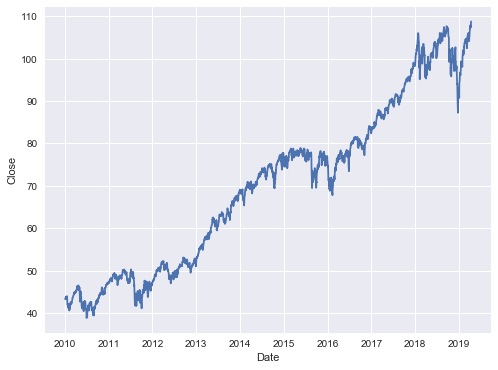

In [49]:
plot_price(df=df2, price='Close')

The closing price has a few ups and downs but the general trend is that it has gradually increased over the years. In particular we can see some dips in between 2015 and 2016 and a strong drop in the price at the end of 2018 which has again increased in 2019.

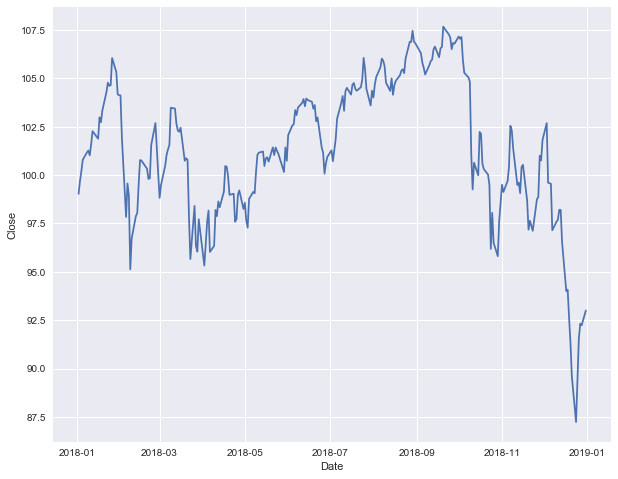

In [50]:
plot_price(df2, price='Close', start='Jan 01, 2018', end='31 Dec 2018')

In 2018 we can't really see a constant trend. There are ups and downs from January to March but in general it increased from April to October and in general it decreased there after. At the end of the year, it dipped to the lowest and then recovered a bit.

d.  Modify your plot_price function (plot_price2) to visualize an optional simple moving average (SMA) and/or an optional exponentially weighted moving average (EWMA), along with the specified price column (still over a specified date range). The SMA argument (sma) should be set to None in the default case, but is specified as an integer over which the SMA is calculated (e.g., a 30-day SMA would be specified as sma=30). The argument for the exponentially weighted moving average (ewma) should be implemented in a similar manner. Each moving average should be overlaid with the price on a similar visualization as for part c, which should include appropriate axis labels as well as a legend that differentiates each visualized time series. Demonstrate the performance of your function on the Close price of your selected ETF for the last year, and provide an explanation about how each moving average captures the behavior of the ETF price.

In [53]:
def plot_price2(df, price, start=None, end=None, sma=None) :
    if start != None and end != None :
        parse(start).strftime('%Y-%m-%d')
        parse(end).strftime('%Y-%m-%d')
        df2[start:end]['Close'].plot(figsize=(10,8))
        df2[start:end]['Close'].rolling(sma).mean().plot()
        plt.legend(('Date','SMA'))
    else :
        df2['Close'].plot(figsize=(10,8))
        df2['Close'].rolling(sma).mean().plot()
        plt.legend(('Date', 'SMA'))

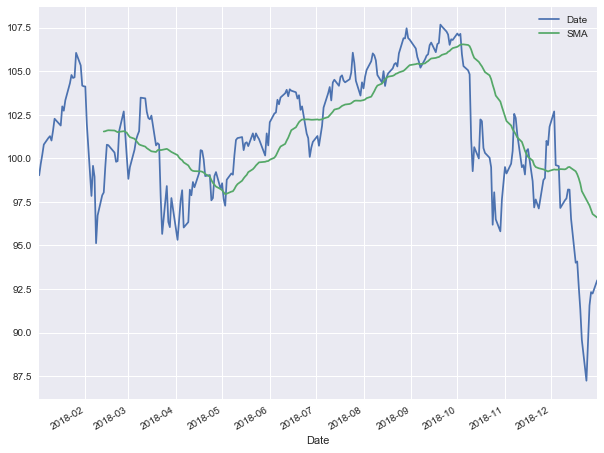

In [54]:
plot_price2(df2, price='Close', start='2018-01-01', end='2018-12-31', sma=30)

For the year 2018 as we can see from the visualization above, the SMA decreases from March to May and then increases until october where it reaches the highest value and then continues to decrease from there on.

e.  Define a function plot_volume that visualizes the trend in aggregate trading volume over a downsampled period. The function should take in the historical price data frame for your selected ETF and a frequency argument (freq) similar to those defined in Table 11-4 in the text. The function should sum the total trading volume over the specified time period, which should be less frequent than the daily data that you have extracted from Yahoo (e.g., monthly, quarterly, annually). The visualization should be of the appropriate type for this data, and the y-axis should be appropriately labeled (the x-axis should be in an appropriate datetime format and does not need to be labeled). Demonstrate the performance of your function on the quarterly volume of your selected ETF for the full date range. Provide a brief description of any trends that you observe in the aggregated trading volume of your selected ETF.

In [55]:
def plot_volume(df, freq):
    df['Volume'].plot(figsize=(10,8))
    df['Volume'].resample(freq).sum().plot()
    plt.ylabel('Volume')
    plt.legend(('Volume','frequency'))

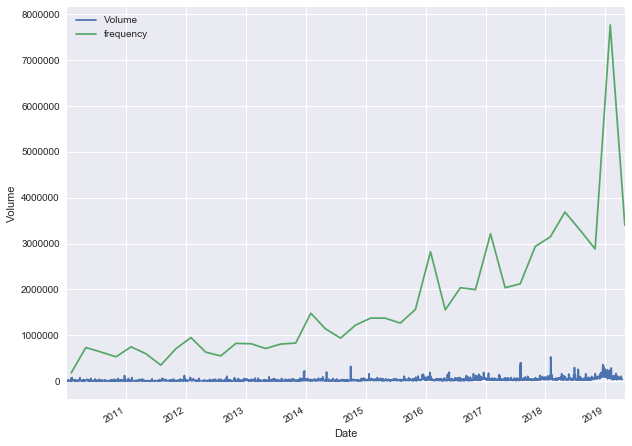

In [56]:
plot_volume(df=df2, freq='3M')

We can see clearly that the quaterly volume has been decreasing or increasing continuously but as a general trend it looks to increase gradually overall from 2010 to 2018. Then it spikes to a very large value and then dips back again in the same magnitude.